<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Softmax Classifer 1D</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will use Softmax to classify three linearly separable classes, the features are in one dimension </p>
<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Softmax">Build Softmax Classifier</a></li>
    <li><a href="#Model_Cost">Train the Model</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries:

In [1]:
# Import the libraries we need for this lab

import torch.nn as nn
import torch
import matplotlib.pyplot as plt 
import numpy as np
from torch.utils.data import Dataset, DataLoader

Use the helper function to plot labeled data points: 

In [2]:
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

Set the random seed:

In [3]:
#Set the random seed

torch.manual_seed(0)

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2> 

Create some linearly separable data with three classes: 

In [4]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

Create the dataset object:

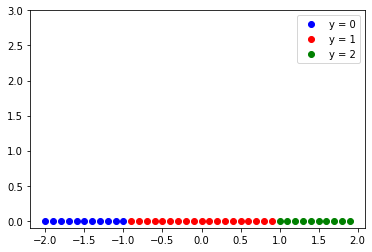

In [5]:
# Create the dataset object and plot the dataset object

data_set = Data()
data_set.x
plot_data(data_set)

<!--Empty Space for separating topics-->

<h2 id="Softmax">Build a Softmax Classifier </h2>

Build a Softmax classifier by using the Sequential module:

In [14]:
# Build Softmax Classifier technically you only need nn.Linear

model = nn.Sequential(nn.Linear(1, 3))
model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.5239],
                      [-0.4626],
                      [-0.4925]])),
             ('0.bias', tensor([-0.0875, -0.0961, -0.7790]))])

<!--Empty Space for separating topics-->

<h2 id="Model">Train the Model</h2> 

Create the criterion function, the optimizer and the dataloader

In [15]:
# Create criterion function, optimizer, and dataloader

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
trainloader = DataLoader(dataset = data_set, batch_size = 5)

Train the model for every 50 epochs plot, the line generated for each class.

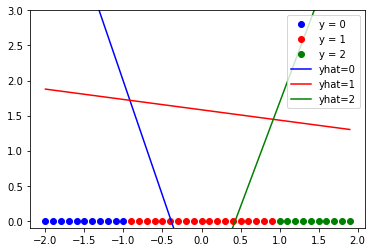

tensor([[ 5.2350,  1.8775, -7.2126],
        [ 4.9101,  1.8627, -6.9161],
        [ 4.5852,  1.8479, -6.6195],
        [ 4.2602,  1.8332, -6.3229],
        [ 3.9353,  1.8184, -6.0264]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 3.6128,  1.8013, -5.7298],
        [ 3.2877,  1.7866, -5.4332],
        [ 2.9627,  1.7720, -5.1367],
        [ 2.6377,  1.7573, -4.8401],
        [ 2.3126,  1.7427, -4.5436]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 1.9931,  1.7226, -4.2470],
        [ 1.6677,  1.7082, -3.9504],
        [ 1.3424,  1.6939, -3.6539],
        [ 1.0170,  1.6795, -3.3573],
        [ 0.6917,  1.6652, -3.0608]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.3635,  1.6538, -2.7642],
        [ 0.0383,  1.6393, -2.4677],
        [-0.2869,  1.6248, -2.1711],
        [-0.6121,  1.6103, -1.8745],
        [-0.9373,  1.5958, -1.5780]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.2638,  1.5829, -1.2816],
        [-1.5890,  1.56

tensor([[-2.9319,  1.5438,  0.2099],
        [-3.2620,  1.5293,  0.5114],
        [-3.5922,  1.5148,  0.8130],
        [-3.9224,  1.5003,  1.1145],
        [-4.2526,  1.4858,  1.4161]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-4.5828,  1.4773,  1.7117],
        [-4.9130,  1.4631,  2.0130],
        [-5.2432,  1.4488,  2.3143],
        [-5.5733,  1.4346,  2.6156],
        [-5.9035,  1.4203,  2.9169]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[-6.2337,  1.3978,  3.2266],
        [-6.5639,  1.3832,  3.5282],
        [-6.8941,  1.3686,  3.8299],
        [-7.2242,  1.3540,  4.1315],
        [-7.5544,  1.3394,  4.4332]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[ 5.3225,  1.9104, -7.3331],
        [ 4.9923,  1.8957, -7.0313],
        [ 4.6621,  1.8810, -6.7295],
        [ 4.3320,  1.8662, -6.4277],
        [ 4.0018,  1.8515, -6.1259]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 3.6739,  1.8345, -5.8242],
        [ 3.3436,  1.81

        [ 4.0582,  1.8796, -6.2105]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 3.7258,  1.8627, -5.9042],
        [ 3.3910,  1.8481, -5.5980],
        [ 3.0563,  1.8335, -5.2918],
        [ 2.7215,  1.8189, -4.9856],
        [ 2.3868,  1.8043, -4.6793]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.0574,  1.7844, -4.3731],
        [ 1.7223,  1.7701, -4.0669],
        [ 1.3873,  1.7558, -3.7607],
        [ 1.0523,  1.7415, -3.4545],
        [ 0.7172,  1.7272, -3.1482]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.3793,  1.7157, -2.8420],
        [ 0.0444,  1.7013, -2.5358],
        [-0.2905,  1.6868, -2.2296],
        [-0.6253,  1.6724, -1.9234],
        [-0.9602,  1.6579, -1.6171]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.2964,  1.6450, -1.3111],
        [-1.6313,  1.6305, -1.0049],
        [-1.9661,  1.6160, -0.6987],
        [-2.3010,  1.6015, -0.3924],
        [-2.6358,  1.5870, -0.0862]], grad_fn=<AddmmBackward

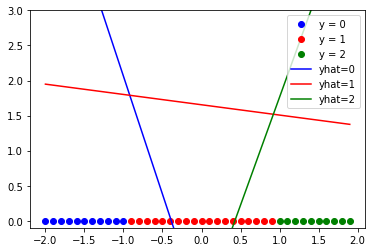

tensor([[ 5.4223,  1.9481, -7.4706],
        [ 5.0862,  1.9334, -7.1628],
        [ 4.7500,  1.9187, -6.8551],
        [ 4.4138,  1.9040, -6.5473],
        [ 4.0776,  1.8893, -6.2396]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 3.7436,  1.8724, -5.9318],
        [ 3.4074,  1.8578, -5.6241],
        [ 3.0711,  1.8432, -5.3163],
        [ 2.7348,  1.8286, -5.0086],
        [ 2.3985,  1.8141, -4.7008]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.0676,  1.7941, -4.3931],
        [ 1.7310,  1.7798, -4.0853],
        [ 1.3944,  1.7656, -3.7776],
        [ 1.0578,  1.7513, -3.4698],
        [ 0.7213,  1.7370, -3.1621]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.3819,  1.7255, -2.8544],
        [ 0.0454,  1.7111, -2.5466],
        [-0.2910,  1.6967, -2.2389],
        [-0.6274,  1.6822, -1.9311],
        [-0.9639,  1.6678, -1.6234]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.3016,  1.6548, -1.3158],
        [-1.6379,  1.64

tensor([[-6.4270,  1.4658,  3.3518],
        [-6.7678,  1.4513,  3.6640],
        [-7.1085,  1.4368,  3.9761],
        [-7.4492,  1.4222,  4.2883],
        [-7.7899,  1.4077,  4.6004]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[ 5.4980,  1.9766, -7.5748],
        [ 5.1572,  1.9620, -7.2625],
        [ 4.8165,  1.9473, -6.9502],
        [ 4.4758,  1.9326, -6.6380],
        [ 4.1351,  1.9179, -6.3257]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 3.7965,  1.9012, -6.0134],
        [ 3.4557,  1.8866, -5.7012],
        [ 3.1149,  1.8720, -5.3889],
        [ 2.7741,  1.8574, -5.0766],
        [ 2.4332,  1.8429, -4.7644]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.0977,  1.8230, -4.4521],
        [ 1.7566,  1.8088, -4.1398],
        [ 1.4155,  1.7945, -3.8276],
        [ 1.0744,  1.7802, -3.5153],
        [ 0.7333,  1.7659, -3.2030]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.3893,  1.7545, -2.8908],
        [ 0.0484,  1.74

tensor([[ 3.8458,  1.9279, -6.0895],
        [ 3.5007,  1.9134, -5.7730],
        [ 3.1557,  1.8988, -5.4565],
        [ 2.8106,  1.8843, -5.1401],
        [ 2.4656,  1.8697, -4.8236]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.1258,  1.8500, -4.5071],
        [ 1.7804,  1.8357, -4.1906],
        [ 1.4351,  1.8214, -3.8742],
        [ 1.0898,  1.8072, -3.5577],
        [ 0.7444,  1.7929, -3.2412]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.3963,  1.7815, -2.9248],
        [ 0.0511,  1.7671, -2.6083],
        [-0.2941,  1.7527, -2.2918],
        [-0.6393,  1.7383, -1.9753],
        [-0.9845,  1.7239, -1.6589]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.3309,  1.7108, -1.3425],
        [-1.6760,  1.6964, -1.0261],
        [-2.0212,  1.6819, -0.7096],
        [-2.3663,  1.6675, -0.3931],
        [-2.7115,  1.6530, -0.0766]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-3.0569,  1.6398,  0.2389],
        [-3.4020,  1.62

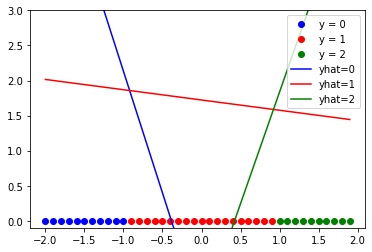

tensor([[ 5.5997,  2.0150, -7.7149],
        [ 5.2529,  2.0004, -7.3966],
        [ 4.9061,  1.9858, -7.0782],
        [ 4.5592,  1.9711, -6.7599],
        [ 4.2124,  1.9565, -6.4416]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 3.8676,  1.9398, -6.1232],
        [ 3.5207,  1.9253, -5.8049],
        [ 3.1738,  1.9107, -5.4865],
        [ 2.8269,  1.8962, -5.1682],
        [ 2.4800,  1.8816, -4.8498]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.1382,  1.8619, -4.5315],
        [ 1.7910,  1.8476, -4.2132],
        [ 1.4438,  1.8334, -3.8948],
        [ 1.0966,  1.8191, -3.5765],
        [ 0.7494,  1.8049, -3.2581]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.3994,  1.7934, -2.9398],
        [ 0.0523,  1.7790, -2.6215],
        [-0.2947,  1.7646, -2.3031],
        [-0.6418,  1.7502, -1.9848],
        [-0.9888,  1.7358, -1.6665]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.3371,  1.7228, -1.3483],
        [-1.6841,  1.70

tensor([[ 0.4062,  1.8196, -2.9728],
        [ 0.0551,  1.8052, -2.6504],
        [-0.2961,  1.7909, -2.3280],
        [-0.6473,  1.7765, -2.0055],
        [-0.9984,  1.7621, -1.6831]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.3508,  1.7490, -1.3608],
        [-1.7019,  1.7346, -1.0384],
        [-2.0530,  1.7202, -0.7160],
        [-2.4041,  1.7058, -0.3935],
        [-2.7553,  1.6913, -0.0711]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-3.1066,  1.6781,  0.2503],
        [-3.4578,  1.6637,  0.5728],
        [-3.8089,  1.6493,  0.8952],
        [-4.1600,  1.6349,  1.2176],
        [-4.5111,  1.6205,  1.5400]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-4.8623,  1.6119,  1.8567],
        [-5.2134,  1.5977,  2.1789],
        [-5.5646,  1.5836,  2.5010],
        [-5.9157,  1.5694,  2.8232],
        [-6.2668,  1.5552,  3.1453]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[-6.6180,  1.5330,  3.4756],
        [-6.9691,  1.51

tensor([[-3.1401,  1.7039,  0.2581],
        [-3.4952,  1.6895,  0.5845],
        [-3.8504,  1.6751,  0.9109],
        [-4.2055,  1.6607,  1.2373],
        [-4.5607,  1.6463,  1.5637]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-4.9159,  1.6377,  1.8844],
        [-5.2710,  1.6235,  2.2106],
        [-5.6262,  1.6094,  2.5368],
        [-5.9813,  1.5952,  2.8630],
        [-6.3365,  1.5811,  3.1891]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[-6.6916,  1.5590,  3.5233],
        [-7.0468,  1.5445,  3.8498],
        [-7.4019,  1.5300,  4.1763],
        [-7.7571,  1.5155,  4.5028],
        [-8.1122,  1.5010,  4.8293]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[ 5.7385,  2.0675, -7.9062],
        [ 5.3834,  2.0529, -7.5796],
        [ 5.0282,  2.0383, -7.2529],
        [ 4.6731,  2.0237, -6.9263],
        [ 4.3179,  2.0091, -6.5997]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 3.9647,  1.9926, -6.2730],
        [ 3.6095,  1.97

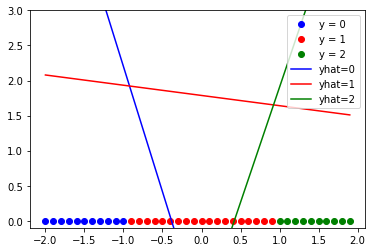

tensor([[ 5.7683,  2.0787, -7.9471],
        [ 5.4113,  2.0641, -7.6187],
        [ 5.0544,  2.0495, -7.2903],
        [ 4.6975,  2.0349, -6.9619],
        [ 4.3405,  2.0203, -6.6335]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 3.9855,  2.0039, -6.3051],
        [ 3.6285,  1.9894, -5.9767],
        [ 3.2715,  1.9749, -5.6483],
        [ 2.9144,  1.9604, -5.3199],
        [ 2.5574,  1.9458, -4.9915]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.2055,  1.9263, -4.6631],
        [ 1.8482,  1.9121, -4.3347],
        [ 1.4909,  1.8978, -4.0063],
        [ 1.1336,  1.8836, -3.6779],
        [ 0.7763,  1.8694, -3.3495]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.4162,  1.8579, -3.0211],
        [ 0.0591,  1.8436, -2.6927],
        [-0.2981,  1.8292, -2.3643],
        [-0.6553,  1.8149, -2.0359],
        [-1.0124,  1.8005, -1.7075]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.3707,  1.7874, -1.3793],
        [-1.7279,  1.77

tensor([[-1.3824,  1.8099, -1.3901],
        [-1.7431,  1.7955, -1.0582],
        [-2.1037,  1.7811, -0.7263],
        [-2.4643,  1.7667, -0.3943],
        [-2.8250,  1.7524, -0.0624]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-3.1858,  1.7391,  0.2686],
        [-3.5465,  1.7247,  0.6005],
        [-3.9071,  1.7104,  0.9323],
        [-4.2678,  1.6960,  1.2642],
        [-4.6284,  1.6816,  1.5961]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-4.9891,  1.6730,  1.9224],
        [-5.3497,  1.6588,  2.2540],
        [-5.7104,  1.6447,  2.5857],
        [-6.0710,  1.6306,  2.9173],
        [-6.4317,  1.6165,  3.2490]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[-6.7923,  1.5944,  3.5886],
        [-7.1530,  1.5799,  3.9205],
        [-7.5136,  1.5655,  4.2525],
        [-7.8743,  1.5510,  4.5845],
        [-8.2349,  1.5365,  4.9165]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[ 5.8302,  2.1021, -8.0325],
        [ 5.4696,  2.08

tensor([[-6.8522,  1.6154,  3.6273],
        [-7.2161,  1.6010,  3.9626],
        [-7.5800,  1.5865,  4.2978],
        [-7.9439,  1.5721,  4.6331],
        [-8.3078,  1.5577,  4.9683]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[ 5.8847,  2.1227, -8.1076],
        [ 5.5208,  2.1081, -7.7722],
        [ 5.1569,  2.0936, -7.4369],
        [ 4.7930,  2.0790, -7.1015],
        [ 4.4291,  2.0645, -6.7662]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 4.0670,  2.0481, -6.4308],
        [ 3.7030,  2.0336, -6.0955],
        [ 3.3390,  2.0192, -5.7601],
        [ 2.9750,  2.0047, -5.4248],
        [ 2.6110,  1.9902, -5.0894]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.2520,  1.9707, -4.7541],
        [ 1.8877,  1.9565, -4.4187],
        [ 1.5234,  1.9423, -4.0834],
        [ 1.1591,  1.9282, -3.7480],
        [ 0.7949,  1.9140, -3.4127]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.4279,  1.9025, -3.0773],
        [ 0.0638,  1.88

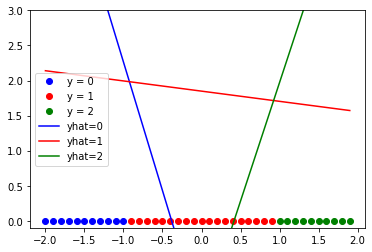

tensor([[ 5.9290,  2.1394, -8.1686],
        [ 5.5624,  2.1249, -7.8306],
        [ 5.1959,  2.1103, -7.4926],
        [ 4.8293,  2.0958, -7.1546],
        [ 4.4627,  2.0812, -6.8166]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 4.0979,  2.0649, -6.4786],
        [ 3.7313,  2.0505, -6.1406],
        [ 3.3646,  2.0360, -5.8026],
        [ 2.9980,  2.0215, -5.4646],
        [ 2.6313,  2.0071, -5.1266]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.2696,  1.9876, -4.7887],
        [ 1.9027,  1.9735, -4.4507],
        [ 1.5358,  1.9593, -4.1127],
        [ 1.1689,  1.9451, -3.7747],
        [ 0.8020,  1.9309, -3.4367]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.4323,  1.9194, -3.0987],
        [ 0.0655,  1.9051, -2.7607],
        [-0.3012,  1.8908, -2.4227],
        [-0.6680,  1.8764, -2.0847],
        [-1.0348,  1.8621, -1.7467]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.4027,  1.8490, -1.4089],
        [-1.7694,  1.83

        [ 4.5124,  2.1060, -6.8911]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 4.1436,  2.0898, -6.5492],
        [ 3.7731,  2.0753, -6.2073],
        [ 3.4025,  2.0609, -5.8654],
        [ 3.0320,  2.0464, -5.5235],
        [ 2.6614,  2.0320, -5.1816]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.2958,  2.0126, -4.8397],
        [ 1.9249,  1.9984, -4.4978],
        [ 1.5541,  1.9842, -4.1559],
        [ 1.1833,  1.9701, -3.8140],
        [ 0.8124,  1.9559, -3.4722]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.4389,  1.9444, -3.1303],
        [ 0.0682,  1.9301, -2.7884],
        [-0.3025,  1.9158, -2.4465],
        [-0.6732,  1.9015, -2.1046],
        [-1.0439,  1.8871, -1.7627]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.4156,  1.8740, -1.4210],
        [-1.7863,  1.8597, -1.0791],
        [-2.1569,  1.8453, -0.7372],
        [-2.5276,  1.8309, -0.3953],
        [-2.8983,  1.8166, -0.0534]], grad_fn=<AddmmBackward

tensor([[ 0.4457,  1.9701, -3.1628],
        [ 0.0710,  1.9558, -2.8169],
        [-0.3037,  1.9415, -2.4710],
        [-0.6785,  1.9272, -2.1251],
        [-1.0532,  1.9129, -1.7792]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.4289,  1.8997, -1.4334],
        [-1.8036,  1.8854, -1.0875],
        [-2.1783,  1.8711, -0.7416],
        [-2.5530,  1.8567, -0.3957],
        [-2.9277,  1.8424, -0.0498]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-3.3025,  1.8291,  0.2953],
        [-3.6772,  1.8147,  0.6412],
        [-4.0519,  1.8004,  0.9871],
        [-4.4266,  1.7861,  1.3329],
        [-4.8013,  1.7718,  1.6788]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-5.1760,  1.7630,  2.0192],
        [-5.5507,  1.7489,  2.3648],
        [-5.9253,  1.7349,  2.7105],
        [-6.3000,  1.7208,  3.0561],
        [-6.6747,  1.7067,  3.4018]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[-7.0494,  1.6848,  3.7552],
        [-7.4241,  1.67

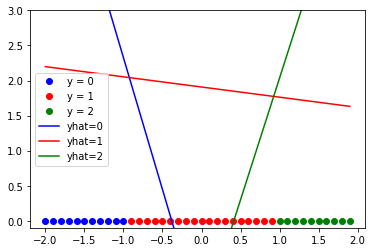

tensor([[ 6.0826,  2.1975, -8.3803],
        [ 5.7069,  2.1830, -8.0332],
        [ 5.3311,  2.1685, -7.6860],
        [ 4.9553,  2.1540, -7.3388],
        [ 4.5796,  2.1395, -6.9917]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 4.2054,  2.1233, -6.6445],
        [ 3.8296,  2.1089, -6.2974],
        [ 3.4537,  2.0945, -5.9502],
        [ 3.0779,  2.0800, -5.6030],
        [ 2.7020,  2.0656, -5.2559]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.3311,  2.0463, -4.9087],
        [ 1.9549,  2.0321, -4.5616],
        [ 1.5788,  2.0180, -4.2144],
        [ 1.2027,  2.0038, -3.8673],
        [ 0.8266,  1.9897, -3.5201]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.4478,  1.9782, -3.1730],
        [ 0.0718,  1.9639, -2.8258],
        [-0.3041,  1.9496, -2.4786],
        [-0.6801,  1.9353, -2.1315],
        [-1.0561,  1.9210, -1.7843]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.4331,  1.9078, -1.4373],
        [-1.8091,  1.89

tensor([[ 0.4536,  1.9998, -3.2004],
        [ 0.0742,  1.9856, -2.8498],
        [-0.3052,  1.9713, -2.4993],
        [-0.6846,  1.9570, -2.1488],
        [-1.0639,  1.9427, -1.7982]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-1.4443,  1.9295, -1.4478],
        [-1.8236,  1.9152, -1.0972],
        [-2.2030,  1.9009, -0.7467],
        [-2.5823,  1.8865, -0.3962],
        [-2.9616,  1.8722, -0.0456]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-3.3412,  1.8589,  0.3041],
        [-3.7205,  1.8446,  0.6546],
        [-4.0998,  1.8303,  1.0052],
        [-4.4792,  1.8160,  1.3557],
        [-4.8585,  1.8017,  1.7062]], grad_fn=<AddmmBackward>) tensor([1, 1, 1, 1, 1])
tensor([[-5.2379,  1.7929,  2.0512],
        [-5.6172,  1.7788,  2.4015],
        [-5.9966,  1.7647,  2.7518],
        [-6.3759,  1.7507,  3.1021],
        [-6.7552,  1.7366,  3.4524]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[-7.1346,  1.7148,  3.8104],
        [-7.5139,  1.70

tensor([[-7.2116,  1.7419,  3.8603],
        [-7.5951,  1.7275,  4.2151],
        [-7.9787,  1.7131,  4.5699],
        [-8.3622,  1.6988,  4.9247],
        [-8.7457,  1.6844,  5.2795]], grad_fn=<AddmmBackward>) tensor([2, 2, 2, 2, 2])
tensor([[ 6.2125,  2.2467, -8.5594],
        [ 5.8290,  2.2322, -8.2045],
        [ 5.4454,  2.2177, -7.8496],
        [ 5.0619,  2.2032, -7.4947],
        [ 4.6784,  2.1888, -7.1398]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 4.2963,  2.1727, -6.7848],
        [ 3.9127,  2.1583, -6.4299],
        [ 3.5291,  2.1439, -6.0750],
        [ 3.1455,  2.1295, -5.7201],
        [ 2.7619,  2.1151, -5.3652]], grad_fn=<AddmmBackward>) tensor([0, 0, 0, 0, 0])
tensor([[ 2.3830,  2.0959, -5.0103],
        [ 1.9991,  2.0818, -4.6554],
        [ 1.6153,  2.0676, -4.3005],
        [ 1.2314,  2.0535, -3.9456],
        [ 0.8475,  2.0393, -3.5907]], grad_fn=<AddmmBackward>) tensor([0, 1, 1, 1, 1])
tensor([[ 0.4610,  2.0278, -3.2358],
        [ 0.0772,  2.01

In [18]:
# Train the model

LOSS = []
def train_model(epochs):
    for epoch in range(epochs):
        if epoch % 50 == 0:
            pass
            plot_data(data_set, model)
        for x, y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            print(yhat,y)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()
train_model(300)

<!--Empty Space for separating topics-->

<h2 id="Result">Analyze Results</h2> 

Find the predicted class on the test data: 

In [24]:
z.max(1)[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
# Make the prediction

z =  model(data_set.x)
#1 is dimension
_, yhat = z.max(1)
print("The prediction:", yhat)


The prediction: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


Calculate the accuracy on the test data:

In [25]:
# Print the accuracy

correct = (data_set.y == yhat).sum().item()
accuracy = correct / len(data_set)
print("The accuracy: ", accuracy)

The accuracy:  1.0


You can also use the softmax function to convert the output to a probability,first, we create a Softmax object:

In [26]:
Softmax_fn=nn.Softmax(dim=-1)

The result is a tensor <code> Probability </code>, where each row corresponds to a different sample, and each column corresponds to that sample  belonging to a particular class

In [27]:
Probability =Softmax_fn(z)

In [28]:
Probability

tensor([[9.8160e-01, 1.8403e-02, 3.6194e-07],
        [9.7357e-01, 2.6428e-02, 7.5281e-07],
        [9.6218e-01, 3.7818e-02, 1.5602e-06],
        [9.4615e-01, 5.3844e-02, 3.2173e-06],
        [9.2387e-01, 7.6123e-02, 6.5879e-06],
        [8.9340e-01, 1.0658e-01, 1.3360e-05],
        [8.5269e-01, 1.4729e-01, 2.6739e-05],
        [7.9989e-01, 2.0005e-01, 5.2600e-05],
        [7.3408e-01, 2.6582e-01, 1.0123e-04],
        [6.5591e-01, 3.4390e-01, 1.8968e-04],
        [5.6826e-01, 4.3139e-01, 3.4461e-04],
        [4.7610e-01, 5.2330e-01, 6.0545e-04],
        [3.8549e-01, 6.1348e-01, 1.0280e-03],
        [3.0213e-01, 6.9618e-01, 1.6896e-03],
        [2.2999e-01, 7.6731e-01, 2.6972e-03],
        [1.7079e-01, 8.2501e-01, 4.2002e-03],
        [1.2429e-01, 8.6930e-01, 6.4100e-03],
        [8.9009e-02, 9.0136e-01, 9.6263e-03],
        [6.2936e-02, 9.2279e-01, 1.4274e-02],
        [4.4043e-02, 9.3501e-01, 2.0947e-02],
        [3.0548e-02, 9.3898e-01, 3.0467e-02],
        [2.1010e-02, 9.3505e-01, 4

we can obtain the probability of the first sample belonging to the first, second and third class respectively as follows:

In [29]:
for i in range(3):
    print("probability of class {} isg given by  {}".format(i, Probability[0,i]) )

probability of class 0 isg given by  0.9815961718559265
probability of class 1 isg given by  0.01840345375239849
probability of class 2 isg given by  3.6194438735037693e-07


<!--Empty Space for separating topics-->

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />
</a>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.